In [2]:
from astropy.table import Table
import matplotlib.pyplot as plt
import math
import numpy
#Imports possibly useful software for Python
t=Table.read('Tgas200_Wright2003_2MASS_FinCat_out.vot')
#t=Table.read('TGAS_d125_Wright03_2Mass.vot')
#Defines t as this table
print("The columns within this catalog are: ")
print(t.colnames)
#Prints out all of the column names for easy reference
Jmag=t["Jmag"]
#Defines Jmag from the Jmag array
Hmag=t["Hmag"]
#Defines Hmag from the Hmag array
Kmag=t["Kmag"]
#Defines Kmag from the Kmag array
Vmag=t["VTmag"]
#Defines Vmag from the array VTmag in the table
Gmag=t["X.Gmag."]
#Defines Gmag from the __Gmag_ array
Bmag=t["BTmag"]
#Defines Bmag from the BTmag array
Jmagerror=t["e_Jmag"]
#Defines the J magnitude error from the table
Hmagerror=t["e_Hmag"]
#Defines the H magnitude error from the table
Kmagerror=t["e_Kmag"]
#Defines the K magnitude error from the table
SpType=t["SpType"]
#Defines SpectralType from the table
QFlags=t["Qfl"]
#Defines QFlags from the Qfl array

The columns within this catalog are: 
['col1', 'angDist', 'd_arcsec', 'X_RAJ2000', 'X_DEJ2000', 'HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', 'X.FG.', 'e_.FG.', 'X.Gmag.', 'Var', 'X_RAJ2000.1', 'X_DEJ2000.1', 'TYC1', 'TYC2.1', 'TYC3', 'RAJ2000', 'DEJ2000', 'VTmag', 'BTmag', 'r_SpType', 'Dist', 'Teff', 'SpType', 'X2MASS', 'RAJ2000.1', 'DEJ2000.1', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag', 'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X', 'MeasureJD']


In [34]:
for i in range(0,len(QFlags)):
    if(QFlags[i][0]==ord("A")):
         Jmag.mask[i]=False
         Jmagerror.mask[i]=False
    else:
         Jmag.mask[i]=True
         Jmagerror.mask[i]=True
         #SpType.mask[i]=True
#The first character of QFlags represents J. Checks whether the first character is A. If it is, the mask on that element
#should be false (off), and if it isn't, the mask on that element should be true (on).
for i in range(0,len(QFlags)):
    if(QFlags[i][1]==ord("A")):
         Hmag.mask[i]=False
         Hmagerror.mask[i]=False
    else:
         Hmag.mask[i]=True
         Hmagerror.mask[i]=True
         #SpType.mask[i]=True
#The second character of QFlags represents H. Checks whether the first character is A. If it is, the mask on that element
#should be false (off), and if it isn't, the mask on that element should be true (on).
for i in range(0,len(QFlags)):
    if(QFlags[i][2]==ord("A")):
         Kmag.mask[i]=False
         Kmagerror.mask[i]=False
    else:
         Kmag.mask[i]=True
         Kmagerror.mask[i]=True
         #SpType.mask[i]=True
#The third character of QFlags represents K. Checks whether the first character is A. If it is, the mask on that element
#should be false (off), and if it isn't, the mask on that element should be true (on).

In [35]:
Distance=1000./t["Plx"]
#Defines the distance to the stars
Jabsmag=Jmag+5-5*numpy.log10(Distance)
Habsmag=Hmag+5-5*numpy.log10(Distance)
Kabsmag=Kmag+5-5*numpy.log10(Distance)
Gabsmag=Gmag+5-5*numpy.log10(Distance)
Vabsmag=Vmag+5-5*numpy.log10(Distance)
Babsmag=Bmag+5-5*numpy.log10(Distance)

In [36]:
TranslatedLuminosityClass=[0.0]*len(SpType)
#Makes this an array of 0's with the same length as SpectralType
for i in range(0,len(SpType)):
    SpT=SpType[i].decode()
    if len(SpT)>2:
        for j in range(0,len(SpT)):
            if SpT[j]=='I':
                TranslatedLuminosityClass[i]=TranslatedLuminosityClass[i]+1
            if SpT[j]=='V':
                TranslatedLuminosityClass[i]=TranslatedLuminosityClass[i]+5
            if SpT[j]=='+':
                TranslatedLuminosityClass[i]=TranslatedLuminosityClass[i]-30
    else:
        TranslatedLuminosityClass[i]=5.1
    if TranslatedLuminosityClass[i]==6:
        TranslatedLuminosityClass[i]=4
    if TranslatedLuminosityClass[i]==11:
        TranslatedLuminosityClass[i]=4.5
    if TranslatedLuminosityClass[i]==9:
        TranslatedLuminosityClass[i]=3.5
    if TranslatedLuminosityClass[i]>5.2:
        TranslatedLuminosityClass[i]=TranslatedLuminosityClass[i]-30
#Runs a loop that "translates" luminosity classes into Arabic numerals, 5.1 for no class, negative numbers for binaries or weird stars, or half-integer numbers for slash stars
BinariesOrUnknownClass=0
#Sets this number at 0
for k in range(0,len(SpType)):
    if TranslatedLuminosityClass[k]<0 or TranslatedLuminosityClass[k]>5:
        BinariesOrUnknownClass=BinariesOrUnknownClass+1
        #Adds 1 to number of binary/unknwon luminosity class stars for "translated" class less than 0 or greater than 5
SingleStarsWithKnownLuminosityClass=len(SpType)-BinariesOrUnknownClass
print('The number of single stars with known luminosity class is: ')
print(SingleStarsWithKnownLuminosityClass)
print('The number of binary stars or stars with unknown luminosity class is: ')
print(BinariesOrUnknownClass)
#Prints out the number of single stars with known luminosity class, and binary stars or stars without a luminosity class
print('The "translated" luminosity classes are: ')
print(TranslatedLuminosityClass)
#Prints out the vector of "translated" luminosity class numbers
#Luminosity classes get turned into number from 1 to 5
#Stars with no luminosity class have "translated" class 5.1
#Unknown spectral type stars and binary stars have negative "translated" class numbers
#Stars with "translated" class numbers halfway between numbers (i.e. 3.5, 4.5, etc.) had slashes (i.e. III/IV)

The number of single stars with known luminosity class is: 
27501
The number of binary stars or stars with unknown luminosity class is: 
22592
The "translated" luminosity classes are: 
[5.1, 5.1, 5.0, 5.1, 3.0, 5.1, 5.1, 5.1, 5.1, 5.0, 0.0, 5.1, 3.0, 5.1, 5.0, 5.1, 4, 5.1, 3.0, 3.5, 5.0, 5.1, 5.1, 5.0, 5.1, 5.1, 5.0, 5.1, 5.0, 5.0, 5.0, 5.0, 4, 5.0, 3.0, 5.1, 5.1, 5.0, 5.1, 5.0, 5.1, 5.0, 5.1, 5.0, 5.0, 5.1, 4, 4, 5.1, 5.0, 5.0, 5.0, 5.1, 5.1, 5.0, 5.0, 5.1, 5.0, 5.0, 5.1, 4, 5.0, 3.0, 5.0, 3.5, 5.1, 4, -30.0, 5.0, 5.1, 5.0, 5.0, 4.5, 5.0, 5.1, 5.0, 5.1, 5.1, 4.5, 5.0, 5.0, 4, 5.0, 5.0, 3.0, 5.1, 5.0, 5.1, 5.0, 5.1, 5.1, 5.0, 5.0, 5.1, 5.0, 5.0, 5.1, 5.0, 5.0, 5.0, 5.1, 5.0, 5.1, 3.0, 5.0, 5.1, 4, 3.0, 5.0, 5.0, 0.0, 5.0, 5.0, 3.0, 5.1, 5.0, 5.1, 5.0, 5.1, 5.0, 5.0, 5.0, 5.1, 5.0, 4.5, 5.1, -25.0, 5.1, 5.1, 5.0, 3.5, 5.0, 5.0, 5.0, 5.0, 5.1, 5.0, 5.0, 5.1, 5.0, 5.1, 5.0, 5.1, 5.1, 0.0, 5.1, 5.1, 5.0, -30.0, 5.0, -27.0, 5.1, 5.1, 3.0, 5.1, 3.0, 5.0, 5.0, 0.0, 5.1, 5.0, 5.1, 5.0, 5.1, 5.

In [37]:
JEffWavelength=1220
HEffWavelength=1630
KEffWavelength=2190
GEffWavelength=600
VEffWavelength=551
BEffWavelength=445
EffWavelengths=[BEffWavelength,VEffWavelength,GEffWavelength,JEffWavelength,HEffWavelength,KEffWavelength]

In [55]:
Teff = t["Teff"]
#Defines effective temperature from the column in the table
MainSequenceJabsmag=[]
MainSequenceHabsmag=[]
MainSequenceKabsmag=[]
MainSequenceGabsmag=[]
MainSequenceVabsmag=[]
MainSequenceBabsmag=[]
MainSequenceTeff=[]
#Defines empty vectors for the magnitudes for stars with luminosity class V (5) (main sequence)
for i in range(0,len(TranslatedLuminosityClass)):
    if TranslatedLuminosityClass[i]==5:
        MainSequenceJabsmag.append(Jabsmag[i])
        MainSequenceHabsmag.append(Habsmag[i])
        MainSequenceKabsmag.append(Kabsmag[i])
        MainSequenceGabsmag.append(Gabsmag[i])
        MainSequenceVabsmag.append(Vabsmag[i])
        MainSequenceBabsmag.append(Babsmag[i])
        MainSequenceTeff.append(Teff[i])
#If the "translated" luminosity class number is 5 (main sequence), appends the corresponding magnitude to the main sequence magnitudes arrays
print('The number of main sequence stars is: ')
print(len(MainSequenceJabsmag))
#Prints the number of main sequence stars

The number of main sequence stars is: 
19960


*****Effective Temperature 3000-3500 K*****
The number of main sequence stars in the effective temperature range 3000-3500 K is:  1
The mean temperature in this effective temperature range is:  3470.0
The minimum effective temperature of a main sequence star in this range is:  3470
The maximum effective temperature of a main sequence star in this range is:  3470
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:2766: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


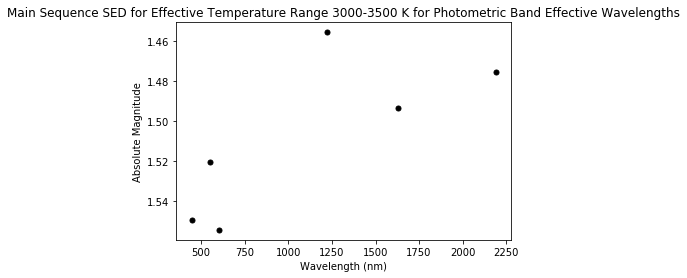

*****Effective Temperature 3500-4000 K*****
The number of main sequence stars in the effective temperature range 3500-4000 K is:  13
The mean temperature in this effective temperature range is:  3800.0
The minimum effective temperature of a main sequence star in this range is:  3580
The maximum effective temperature of a main sequence star in this range is:  4000
The standard deviation of the effective temperatures of main sequence stars in this range is:  114.219761189


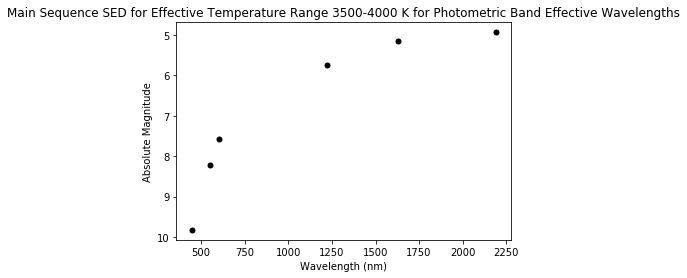

*****Effective Temperature 4000-4500 K*****
The number of main sequence stars in the effective temperature range 4000-4500 K is:  89
The mean temperature in this effective temperature range is:  4268.20224719
The minimum effective temperature of a main sequence star in this range is:  4000
The maximum effective temperature of a main sequence star in this range is:  4420
The standard deviation of the effective temperatures of main sequence stars in this range is:  143.092347001


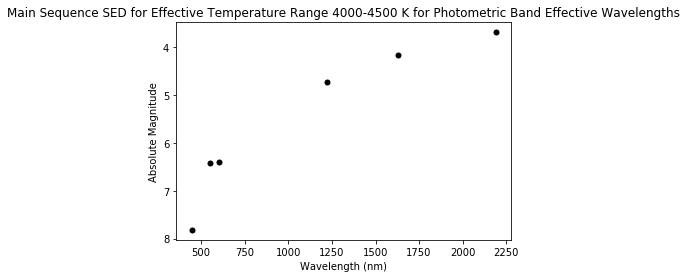

*****Effective Temperature 4500-5000 K*****
The number of main sequence stars in the effective temperature range 4500-5000 K is:  295
The mean temperature in this effective temperature range is:  4781.52542373
The minimum effective temperature of a main sequence star in this range is:  4590
The maximum effective temperature of a main sequence star in this range is:  4900
The standard deviation of the effective temperatures of main sequence stars in this range is:  113.770711422


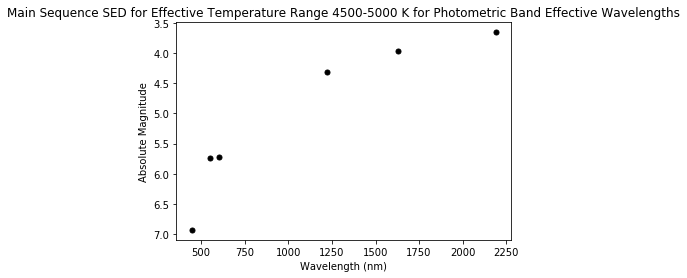

*****Effective Temperature 5000-5500 K*****
The number of main sequence stars in the effective temperature range 5000-5500 K is:  452
The mean temperature in this effective temperature range is:  5191.28318584
The minimum effective temperature of a main sequence star in this range is:  5080
The maximum effective temperature of a main sequence star in this range is:  5450
The standard deviation of the effective temperatures of main sequence stars in this range is:  81.8002065283


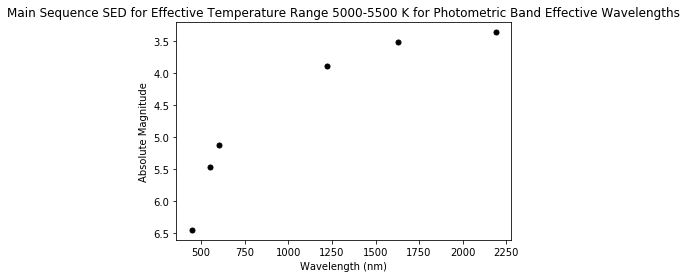

*****Effective Temperature 5500-6000 K*****
The number of main sequence stars in the effective temperature range 5500-6000 K is:  4522
The mean temperature in this effective temperature range is:  5788.25077399
The minimum effective temperature of a main sequence star in this range is:  5570
The maximum effective temperature of a main sequence star in this range is:  5860
The standard deviation of the effective temperatures of main sequence stars in this range is:  96.304406006


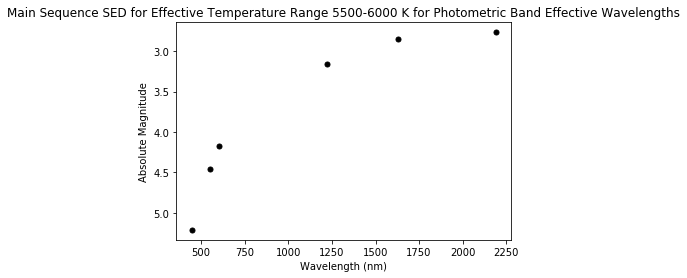

*****Effective Temperature 6000-6500 K*****
The number of main sequence stars in the effective temperature range 6000-6500 K is:  8401
The mean temperature in this effective temperature range is:  6316.11474824
The minimum effective temperature of a main sequence star in this range is:  6030
The maximum effective temperature of a main sequence star in this range is:  6470
The standard deviation of the effective temperatures of main sequence stars in this range is:  174.840272774


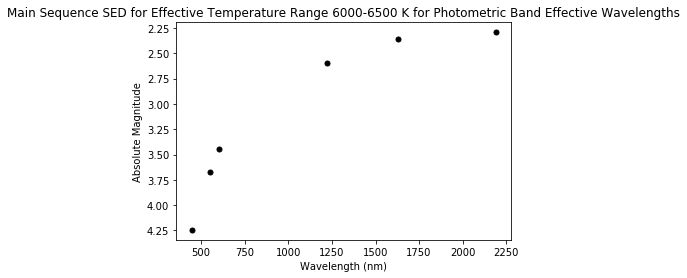

*****Effective Temperature 6500-7000 K*****
The number of main sequence stars in the effective temperature range 6500-7000 K is:  3059
The mean temperature in this effective temperature range is:  6889.92808107
The minimum effective temperature of a main sequence star in this range is:  6870
The maximum effective temperature of a main sequence star in this range is:  6890
The standard deviation of the effective temperatures of main sequence stars in this range is:  1.19716591286


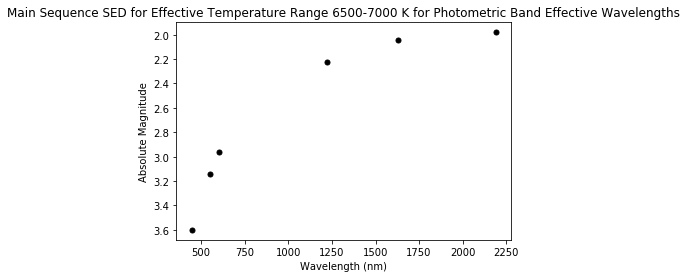

*****Effective Temperature 7000-7500 K*****
The number of main sequence stars in the effective temperature range 7000-7500 K is:  897
The mean temperature in this effective temperature range is:  7201.1148272
The minimum effective temperature of a main sequence star in this range is:  7150
The maximum effective temperature of a main sequence star in this range is:  7450
The standard deviation of the effective temperatures of main sequence stars in this range is:  19.0019999182


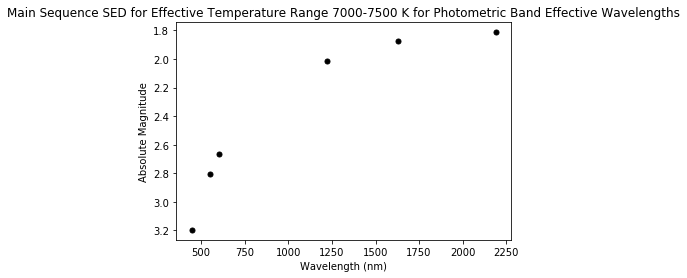

*****Effective Temperature 7500-8000 K*****
The number of main sequence stars in the effective temperature range 7500-8000 K is:  627
The mean temperature in this effective temperature range is:  7847.76714514
The minimum effective temperature of a main sequence star in this range is:  7650
The maximum effective temperature of a main sequence star in this range is:  7850
The standard deviation of the effective temperatures of main sequence stars in this range is:  21.0139318558


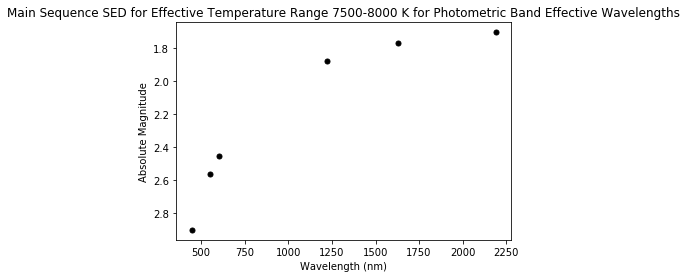

*****Effective Temperature 8000-8500 K*****
The number of main sequence stars in the effective temperature range 8000-8500 K is:  194
The mean temperature in this effective temperature range is:  8194.32989691
The minimum effective temperature of a main sequence star in this range is:  8100
The maximum effective temperature of a main sequence star in this range is:  8200
The standard deviation of the effective temperatures of main sequence stars in this range is:  23.1270456435


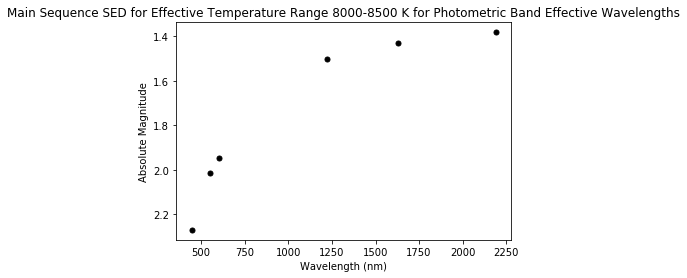

*****Effective Temperature 8500-9000 K*****
The number of main sequence stars in the effective temperature range 8500-9000 K is:  551
The mean temperature in this effective temperature range is:  8819.50998185
The minimum effective temperature of a main sequence star in this range is:  8600
The maximum effective temperature of a main sequence star in this range is:  9000
The standard deviation of the effective temperatures of main sequence stars in this range is:  128.63775794


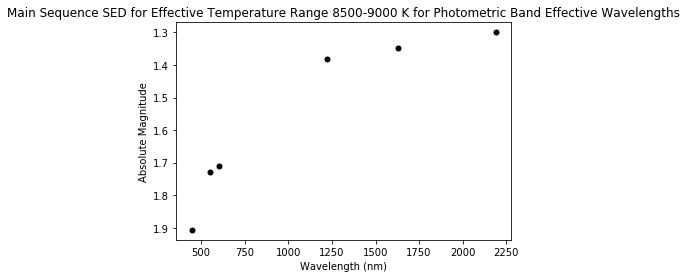

*****Effective Temperature 9000-9500 K*****
The number of main sequence stars in the effective temperature range 9000-9500 K is:  274
The mean temperature in this effective temperature range is:  9224.19708029
The minimum effective temperature of a main sequence star in this range is:  9000
The maximum effective temperature of a main sequence star in this range is:  9480
The standard deviation of the effective temperatures of main sequence stars in this range is:  41.7007657015


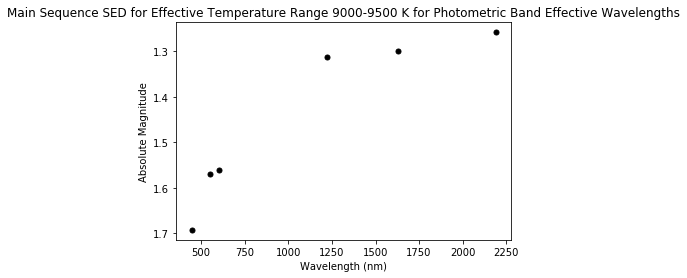

*****Effective Temperature 9500-10000 K*****
The number of main sequence stars in the effective temperature range 9500-10000 K is:  346
The mean temperature in this effective temperature range is:  9520.0
The minimum effective temperature of a main sequence star in this range is:  9520
The maximum effective temperature of a main sequence star in this range is:  9520
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


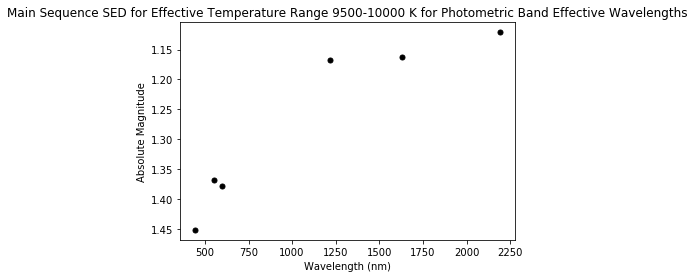

*****Effective Temperature 10000-10500 K*****
The number of main sequence stars in the effective temperature range 10000-10500 K is:  178
The mean temperature in this effective temperature range is:  10500.0
The minimum effective temperature of a main sequence star in this range is:  10500
The maximum effective temperature of a main sequence star in this range is:  10500
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


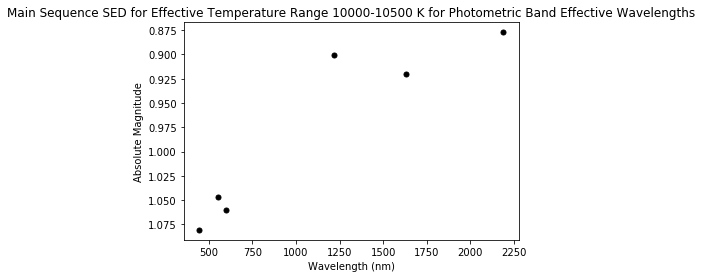

*****Effective Temperature 10500-11000 K*****
The number of main sequence stars in the effective temperature range 10500-11000 K is:  181
The mean temperature in this effective temperature range is:  10508.2872928
The minimum effective temperature of a main sequence star in this range is:  10500
The maximum effective temperature of a main sequence star in this range is:  11000
The standard deviation of the effective temperatures of main sequence stars in this range is:  63.8354696591


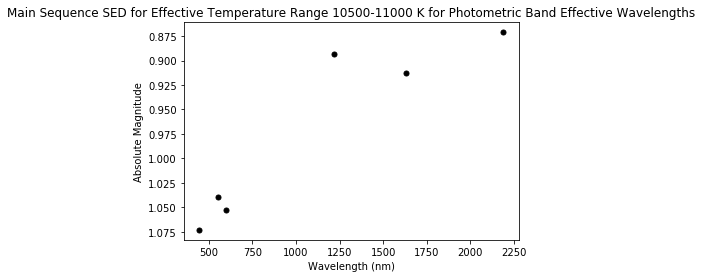

*****Effective Temperature 11000-11500 K*****
The number of main sequence stars in the effective temperature range 11000-11500 K is:  3
The mean temperature in this effective temperature range is:  11000.0
The minimum effective temperature of a main sequence star in this range is:  11000
The maximum effective temperature of a main sequence star in this range is:  11000
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


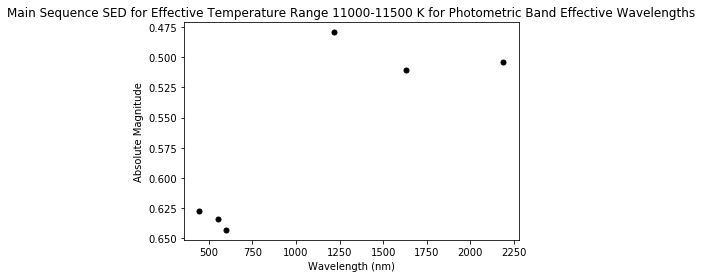

*****Effective Temperature 11500-12000 K*****
The number of main sequence stars in the effective temperature range 11500-12000 K is:  40
The mean temperature in this effective temperature range is:  11900.0
The minimum effective temperature of a main sequence star in this range is:  11900
The maximum effective temperature of a main sequence star in this range is:  11900
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


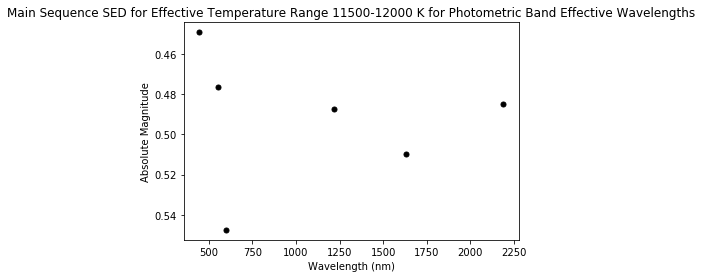

*****Effective Temperature 12000-12500 K*****
The number of main sequence stars in the effective temperature range 12000-12500 K is:  1
The mean temperature in this effective temperature range is:  12400.0
The minimum effective temperature of a main sequence star in this range is:  12400
The maximum effective temperature of a main sequence star in this range is:  12400
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


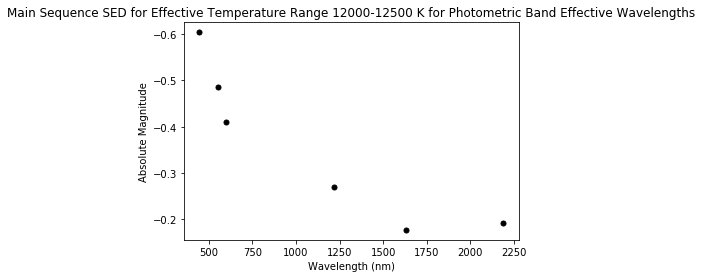

*****Effective Temperature 12500-13000 K*****
The number of main sequence stars in the effective temperature range 12500-13000 K is:  13
The mean temperature in this effective temperature range is:  13000.0
The minimum effective temperature of a main sequence star in this range is:  13000
The maximum effective temperature of a main sequence star in this range is:  13000
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


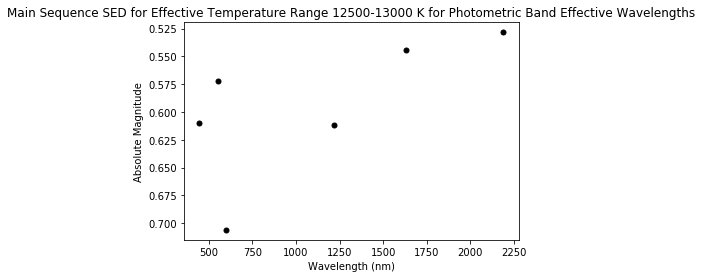

*****Effective Temperature 13000-13500 K*****
The number of main sequence stars in the effective temperature range 13000-13500 K is:  13
The mean temperature in this effective temperature range is:  13000.0
The minimum effective temperature of a main sequence star in this range is:  13000
The maximum effective temperature of a main sequence star in this range is:  13000
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


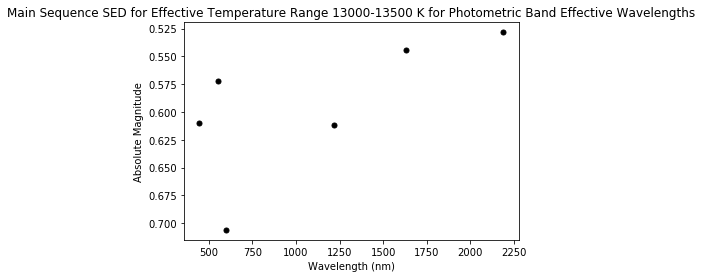

*****Effective Temperature 13500-14000 K*****
The number of main sequence stars in the effective temperature range 13500-14000 K is:  4
The mean temperature in this effective temperature range is:  14000.0
The minimum effective temperature of a main sequence star in this range is:  14000
The maximum effective temperature of a main sequence star in this range is:  14000
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


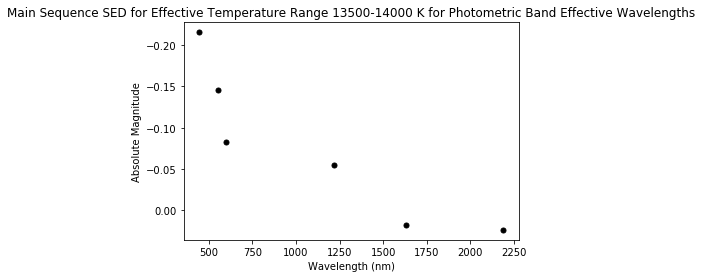

*****Effective Temperature 14000-14500 K*****
The number of main sequence stars in the effective temperature range 14000-14500 K is:  4
The mean temperature in this effective temperature range is:  14000.0
The minimum effective temperature of a main sequence star in this range is:  14000
The maximum effective temperature of a main sequence star in this range is:  14000
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


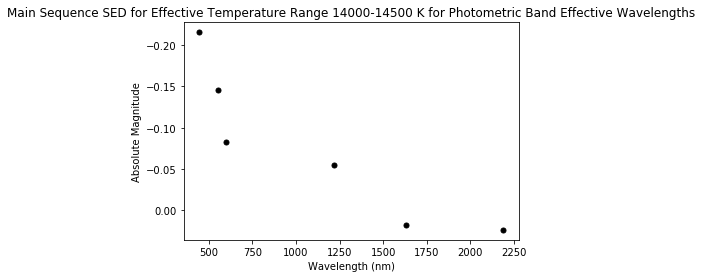

In [56]:
LowTemperatures=[3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000,10500,11000,11500,12000,12500,13000,13500,14000]
AverageTemperatures=[]
MinimumTemperatures=[]
MaximumTemperatures=[]
TemperatureStandardDeviations=[]
for i in LowTemperatures:
    print('*****Effective Temperature %g-%g K*****'%(i,i+500))
    TeffMask=numpy.ma.masked_outside(MainSequenceTeff,i,i+500)
    Teffplt=numpy.ma.compressed(TeffMask)
    n=TeffMask.count()
    print('The number of main sequence stars in the effective temperature range %g-%g K is: '%(i,i+500),n)
    MeanTemperature=sum(Teffplt)/n
    print('The mean temperature in this effective temperature range is: ',MeanTemperature)
    AverageTemperatures.append(MeanTemperature)
    MinimumTemperature=min(Teffplt)
    print('The minimum effective temperature of a main sequence star in this range is: ',MinimumTemperature)
    MinimumTemperatures.append(MinimumTemperature)
    MaximumTemperature=max(Teffplt)
    print('The maximum effective temperature of a main sequence star in this range is: ',MaximumTemperature)
    MaximumTemperatures.append(MaximumTemperature)
    TemperatureStandardDeviation=numpy.std(TeffMask)
    print('The standard deviation of the effective temperatures of main sequence stars in this range is: ',TemperatureStandardDeviation)
    TemperatureStandardDeviations.append(TemperatureStandardDeviation)    
    JMask=numpy.ma.array(MainSequenceJabsmag,mask=TeffMask.mask)
    Jplt=numpy.ma.compressed(JMask)
    Jplt=Jplt[~numpy.isnan(Jplt)]
    MeanMainSequenceJplt=numpy.average(Jplt)
    HMask=numpy.ma.array(MainSequenceHabsmag,mask=TeffMask.mask)
    Hplt=numpy.ma.compressed(HMask)
    Hplt=Hplt[~numpy.isnan(Hplt)]
    MeanMainSequenceHplt=numpy.average(Hplt)
    KMask=numpy.ma.array(MainSequenceKabsmag,mask=TeffMask.mask)
    Kplt=numpy.ma.compressed(KMask)
    Kplt=Kplt[~numpy.isnan(Kplt)]
    MeanMainSequenceKplt=numpy.average(Kplt)
    GMask=numpy.ma.array(MainSequenceGabsmag,mask=TeffMask.mask)
    Gplt=numpy.ma.compressed(GMask)
    Gplt=Gplt[~numpy.isnan(Gplt)]
    MeanMainSequenceGplt=numpy.average(Gplt)
    VMask=numpy.ma.array(MainSequenceVabsmag,mask=TeffMask.mask)
    Vplt=numpy.ma.compressed(VMask)
    Vplt=Vplt[~numpy.isnan(Vplt)]
    MeanMainSequenceVplt=numpy.average(Vplt)
    BMask=numpy.ma.array(MainSequenceBabsmag,mask=TeffMask.mask)
    Bplt=numpy.ma.compressed(BMask)
    Bplt=Bplt[~numpy.isnan(Bplt)]
    MeanMainSequenceBplt=numpy.average(Bplt)
    FilterAbsMag=[MeanMainSequenceBplt,MeanMainSequenceVplt,MeanMainSequenceGplt,MeanMainSequenceJplt,MeanMainSequenceHplt,MeanMainSequenceKplt] 
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Absolute Magnitude')
    plt.title('Main Sequence SED for Effective Temperature Range %g-%g K for Photometric Band Effective Wavelengths'%(i,i+500))
    plt.plot(EffWavelengths,FilterAbsMag,'ko',ms=5)
    plt.gca().invert_yaxis()
    plt.show()

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:2766: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


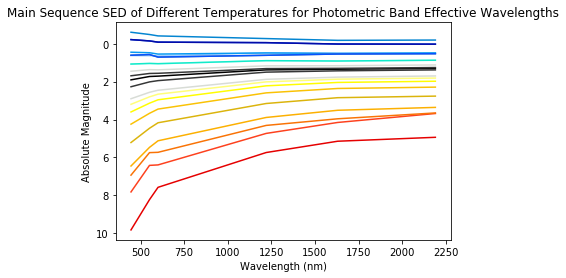

In [90]:
LowTemperatures=[3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000,10500,11000,11500,12000,12500,13000,13500,14000]
AverageTemperatures=[]
MinimumTemperatures=[]
MaximumTemperatures=[]
TemperatureStandardDeviations=[]
for i in LowTemperatures:
    TeffMask=numpy.ma.masked_outside(MainSequenceTeff,i,i+500)
    Teffplt=numpy.ma.compressed(TeffMask)
    n=TeffMask.count()
    MeanTemperature=sum(Teffplt)/n
    JMask=numpy.ma.array(MainSequenceJabsmag,mask=TeffMask.mask)
    Jplt=numpy.ma.compressed(JMask)
    Jplt=Jplt[~numpy.isnan(Jplt)]
    MeanMainSequenceJplt=numpy.average(Jplt)
    HMask=numpy.ma.array(MainSequenceHabsmag,mask=TeffMask.mask)
    Hplt=numpy.ma.compressed(HMask)
    Hplt=Hplt[~numpy.isnan(Hplt)]
    MeanMainSequenceHplt=numpy.average(Hplt)
    KMask=numpy.ma.array(MainSequenceKabsmag,mask=TeffMask.mask)
    Kplt=numpy.ma.compressed(KMask)
    Kplt=Kplt[~numpy.isnan(Kplt)]
    MeanMainSequenceKplt=numpy.average(Kplt)
    GMask=numpy.ma.array(MainSequenceGabsmag,mask=TeffMask.mask)
    Gplt=numpy.ma.compressed(GMask)
    Gplt=Gplt[~numpy.isnan(Gplt)]
    MeanMainSequenceGplt=numpy.average(Gplt)
    VMask=numpy.ma.array(MainSequenceVabsmag,mask=TeffMask.mask)
    Vplt=numpy.ma.compressed(VMask)
    Vplt=Vplt[~numpy.isnan(Vplt)]
    MeanMainSequenceVplt=numpy.average(Vplt)
    BMask=numpy.ma.array(MainSequenceBabsmag,mask=TeffMask.mask)
    Bplt=numpy.ma.compressed(BMask)
    Bplt=Bplt[~numpy.isnan(Bplt)]
    MeanMainSequenceBplt=numpy.average(Bplt)
    FilterAbsMag=[MeanMainSequenceBplt,MeanMainSequenceVplt,MeanMainSequenceGplt,MeanMainSequenceJplt,MeanMainSequenceHplt,MeanMainSequenceKplt] 
    #if i==3000:
        #plt.plot(EffWavelengths,FilterAbsMag,'xkcd:blood',ms=5)
    if i==3500:
        plt.plot(EffWavelengths,FilterAbsMag,'xkcd:red',ms=5)
    elif i==4000:
        plt.plot(EffWavelengths,FilterAbsMag,'xkcd:orange red',ms=5)
    elif i==4500:
        plt.plot(EffWavelengths,FilterAbsMag,'xkcd:orange',ms=5)
    elif i==5000:
        plt.plot(EffWavelengths,FilterAbsMag,'xkcd:yellow orange',ms=5)
    elif i==5500:
        plt.plot(EffWavelengths,FilterAbsMag,'xkcd:gold',ms=5)
    elif i==6000:
        plt.plot(EffWavelengths,FilterAbsMag,'xkcd:goldenrod',ms=5)
    elif i==6500:
        plt.plot(EffWavelengths,FilterAbsMag,'xkcd:bright yellow',ms=5)
    elif i==7000:
        plt.plot(EffWavelengths,FilterAbsMag,'xkcd:light yellow',ms=5)
    elif i==7500:
        plt.plot(EffWavelengths,FilterAbsMag,'xkcd:light grey',ms=5)
    elif i==8000:
        plt.plot(EffWavelengths,FilterAbsMag,'xkcd:dark grey',ms=5)
    elif i==8500:
        plt.plot(EffWavelengths,FilterAbsMag,'xkcd:black',ms=5)
    elif i==9000:
        plt.plot(EffWavelengths,FilterAbsMag,'xkcd:dark grey',ms=5)
    elif i==9500:
        plt.plot(EffWavelengths,FilterAbsMag,'xkcd:light grey',ms=5)
    elif i==10000:
        plt.plot(EffWavelengths,FilterAbsMag,'xkcd:pale cyan',ms=5)
    elif i==10500:
        plt.plot(EffWavelengths,FilterAbsMag,'xkcd:aqua',ms=5)
    elif i==11000:
        plt.plot(EffWavelengths,FilterAbsMag,'xkcd:baby blue',ms=5)
    elif i==11500:
        plt.plot(EffWavelengths,FilterAbsMag,'xkcd:azure',ms=5)
    elif i==12000:
        plt.plot(EffWavelengths,FilterAbsMag,'xkcd:cerulean',ms=5)
    elif i==12500:
        plt.plot(EffWavelengths,FilterAbsMag,'xkcd:dusty blue',ms=5)
    elif i==13000:
        plt.plot(EffWavelengths,FilterAbsMag,'xkcd:electric blue',ms=5)
    elif i==13500:
        plt.plot(EffWavelengths,FilterAbsMag,'xkcd:blue',ms=5)
    elif i==14000:
        plt.plot(EffWavelengths,FilterAbsMag,'xkcd:cobalt blue',ms=5)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absolute Magnitude')
plt.title('Main Sequence SED of Different Temperatures for Photometric Band Effective Wavelengths')
plt.gca().invert_yaxis()
plt.show()